In [2]:
from utils import *
mnist = prepare_full_MNIST_databunch(data_path=Path('tmp'))

344it [00:00, 3431.72it/s]

Processing...
Done!


60000it [00:15, 3866.26it/s]
10000it [00:02, 3524.32it/s]


## MNIST: Class assignment per test case

In [82]:
tt = ToyAnomalyDetection(mnist, n_anomaly_labels=1, n_cases=10, distance='cosine')

In [75]:
class ImageDataBunchHelper:
    def __init__(self, data, valid_view_idx=0):
        self.data = data
        valid_y = np.array([int(y) for y in data.valid_ds.y])
        self.valid_item0_idxs = [np.where(valid_y == i)[0][valid_view_idx]
                                 for i in range(data.c)]
    def show_valid_item0(self, cls, ax):
        self.data.valid_ds[self.valid_item0_idxs[cls]][0].show(ax=ax)

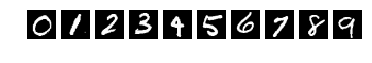

In [78]:
fig, axs = plt.subplots(1, mnist.c)
helper = ImageDataBunchHelper(mnist, valid_view_idx=1)
for i, ax in enumerate(axs):
    helper.show_valid_item0(i, ax=ax)

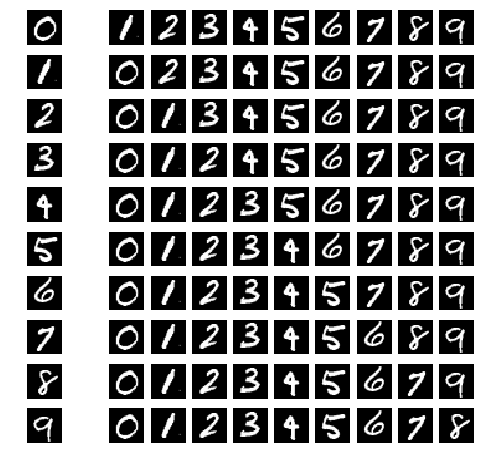

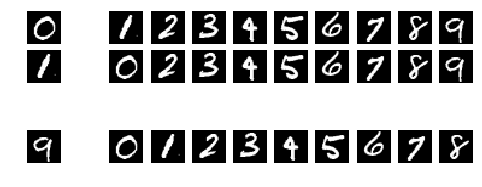

In [90]:
def draw_test_case_matrix(skip_middle_row=False):
    empty = np.ones_like(helper.data.train_ds[0][0].data.numpy())
    fig, allaxes = plt.subplots(4 if skip_middle_row else tt.n_cases,
                                tt.c + 1,
                                figsize=(8, 2.8 if skip_middle_row else 8))
    for r, axes in enumerate(allaxes):
        if skip_middle_row:
            if r == 2:
                for ax in axes: show_np_image(empty, ax=ax, axis_off=True)
                continue
            elif r == 3:
                r = tt.n_cases - 1
        anocls = tt.anomaly_classes(r)
        norcls = [cls for cls in range(tt.c) if cls not in anocls]
        for c, ax in zip(anocls, axes[:tt.n_anomaly_labels]):
            helper.show_valid_item0(c, ax=ax)
        show_np_image(empty, ax=axes[tt.n_anomaly_labels], axis_off=True)
        for c, ax in zip(norcls, axes[tt.n_anomaly_labels + 1:]):
            helper.show_valid_item0(c, ax=ax)
draw_test_case_matrix(skip_middle_row=False)
draw_test_case_matrix(skip_middle_row=True)

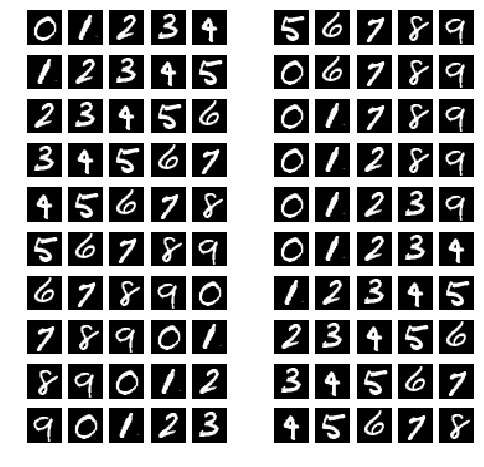

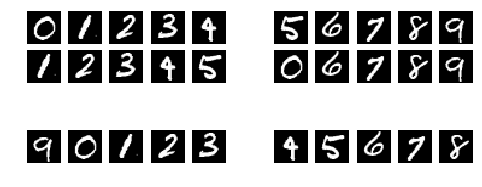

In [81]:
tt = ToyAnomalyDetection(mnist, n_anomaly_labels=5, n_cases=10, distance='cosine')
draw_test_case_matrix(skip_middle_row=False)
draw_test_case_matrix(skip_middle_row=True)

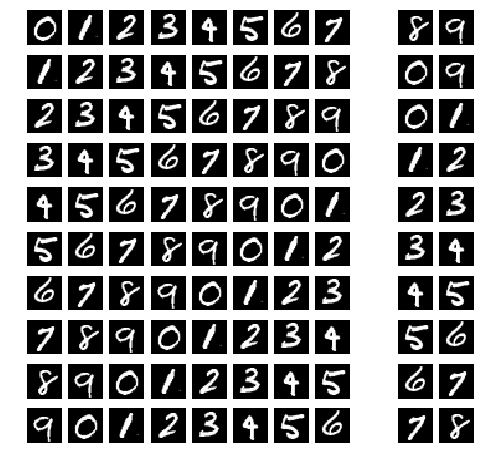

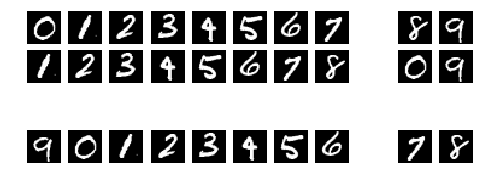

In [80]:
tt = ToyAnomalyDetection(mnist, n_anomaly_labels=8, n_cases=10, distance='cosine')
draw_test_case_matrix(skip_middle_row=False)
draw_test_case_matrix(skip_middle_row=True)

## CIFAR10

In [91]:
cifar10 = prepare_CIFAR10_databunch(data_path=Path('tmp2'))
helper = ImageDataBunchHelper(cifar10, valid_view_idx=1)

Files already downloaded and verified


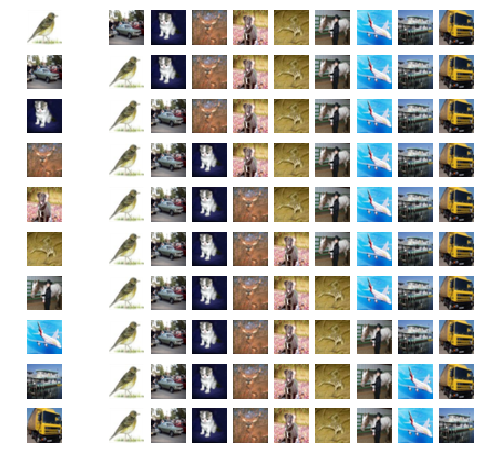

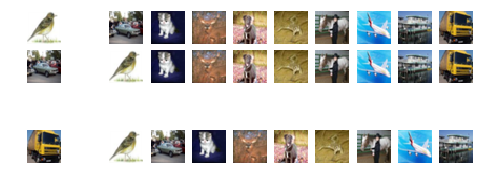

In [92]:
tt = ToyAnomalyDetection(cifar10, n_anomaly_labels=1, n_cases=10, distance='cosine')
draw_test_case_matrix(skip_middle_row=False)
draw_test_case_matrix(skip_middle_row=True)

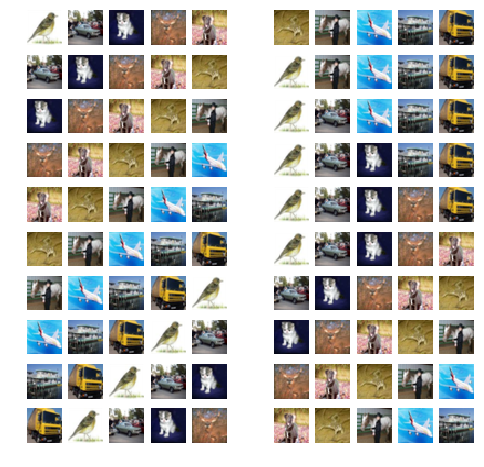

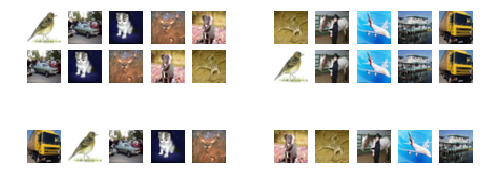

In [93]:
tt = ToyAnomalyDetection(cifar10, n_anomaly_labels=5, n_cases=10, distance='cosine')
draw_test_case_matrix(skip_middle_row=False)
draw_test_case_matrix(skip_middle_row=True)

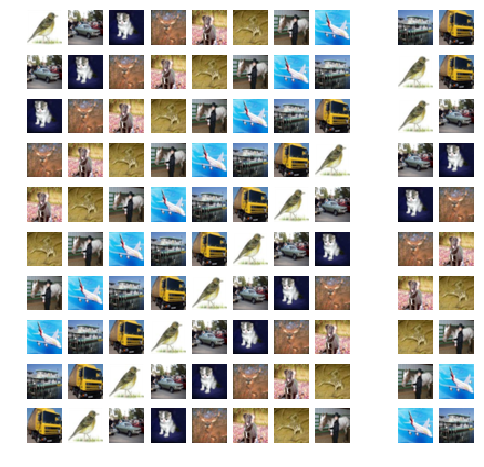

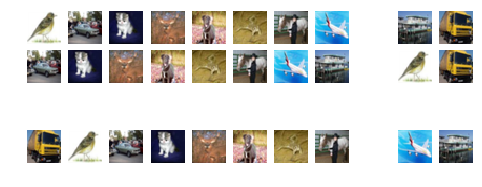

In [94]:
tt = ToyAnomalyDetection(cifar10, n_anomaly_labels=8, n_cases=10, distance='cosine')
draw_test_case_matrix(skip_middle_row=False)
draw_test_case_matrix(skip_middle_row=True)

In [95]:
ensure_delete('tmp')
ensure_delete('tmp2')